# Customer Segmentation for Banking Services 

In [ ]:
# Data Extraction and Understanding


--- Initial Exploration of the Dataset ---

First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Dataset Information:
<class 'pandas.

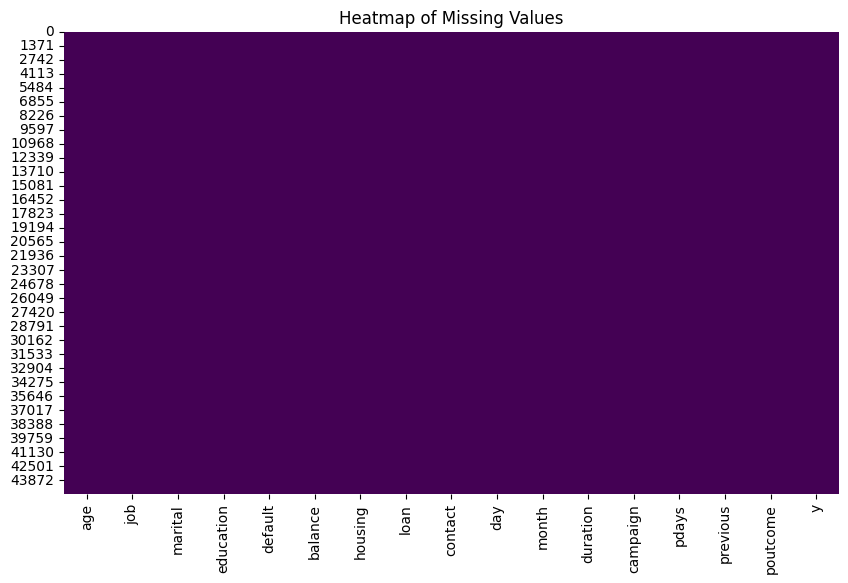


--- Data Type and Consistency Check ---

Updated Data Types:
age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

--- Handling Missing Values ---

--- Duplicate Data Check ---
Number of duplicate rows found: 0

--- Outlier Detection ---
Number of potential outliers in 'age': 487
Number of potential outliers in 'balance': 4729
Number of potential outliers in 'day': 0
Number of potential outliers in 'duration': 3235
Number of potential outliers in 'campaign': 3064
Number of potential outliers in 'pdays': 8257
Number of potential outliers in 'previous': 8257

--- Initial Feature Analysis ---


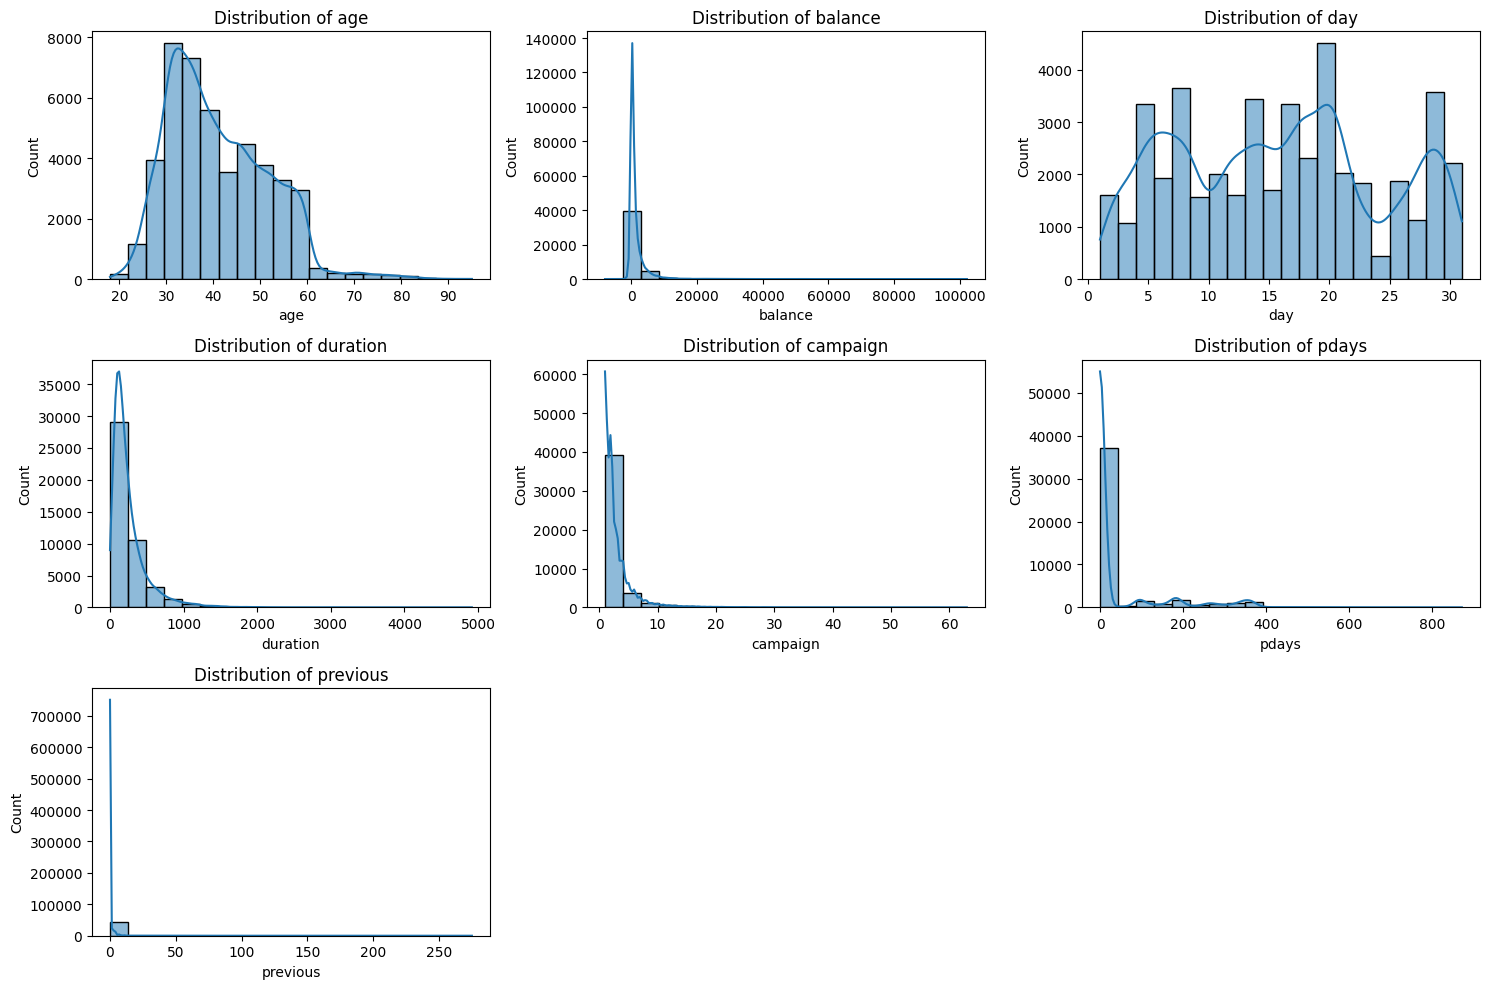

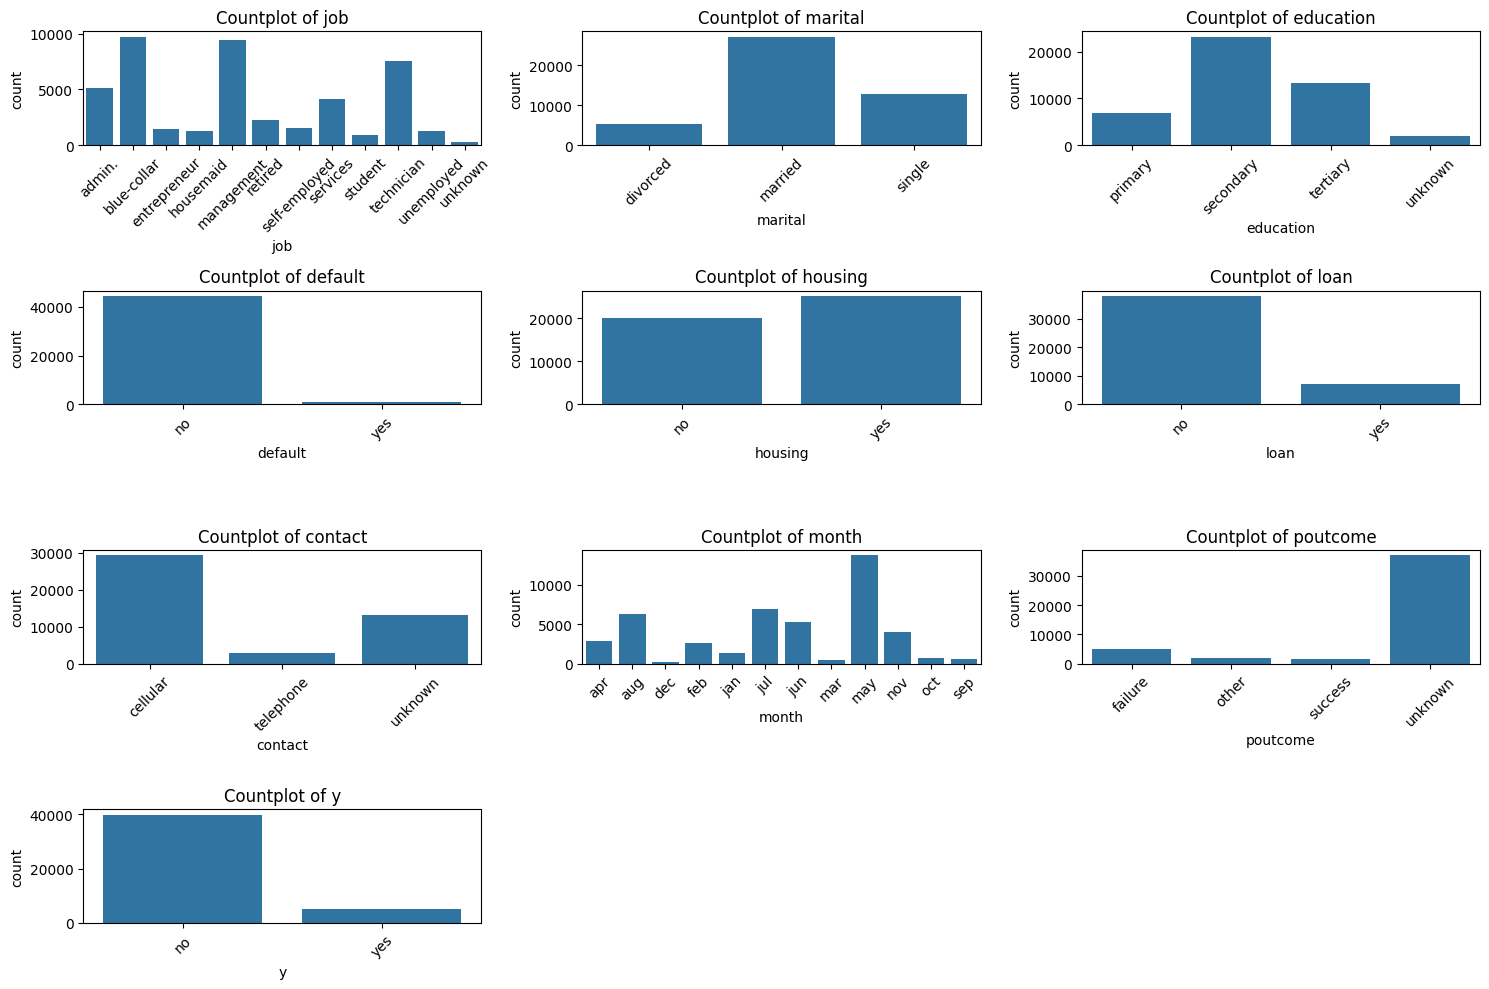


--- Correlation Analysis ---


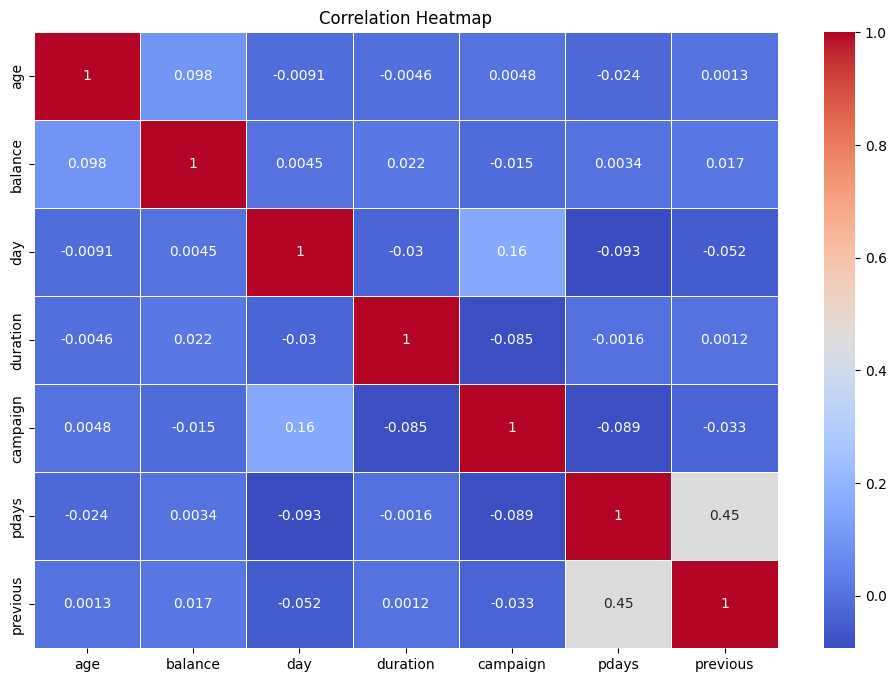


--- Summary of Findings ---
Highly Correlated Features:
          age  balance  day  duration  campaign  pdays  previous
age       1.0      NaN  NaN       NaN       NaN    NaN       NaN
balance   NaN      1.0  NaN       NaN       NaN    NaN       NaN
day       NaN      NaN  1.0       NaN       NaN    NaN       NaN
duration  NaN      NaN  NaN       1.0       NaN    NaN       NaN
campaign  NaN      NaN  NaN       NaN       1.0    NaN       NaN
pdays     NaN      NaN  NaN       NaN       NaN    1.0       NaN
previous  NaN      NaN  NaN       NaN       NaN    NaN       1.0


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the CSV file path
csv_file_path = 'bank-full.csv'  # Update this with the correct path if it's located elsewhere

# Load the CSV file into a pandas DataFrame
# The bank marketing dataset often uses ";" as a separator, so we specify that
df = pd.read_csv(csv_file_path, sep=';')

# Step 1: Initial Exploration of the Dataset
# ------------------------------------------
print("\n--- Initial Exploration of the Dataset ---")

# View the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display dataset info (column names, non-null counts, and data types)
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# Summary for categorical features
print("\nSummary for Categorical Features:")
print(df.describe(include='object'))

# Step 2: Identify Missing Values
# --------------------------------
print("\n--- Missing Values Analysis ---")

# Calculate missing values for each column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(missing_columns)

# Visualize missing values if necessary
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Step 3: Data Type and Consistency Check
# ---------------------------------------
print("\n--- Data Type and Consistency Check ---")

# Convert columns to appropriate data types where necessary
# Example: Assuming there are date columns or categorical columns
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert object types that represent categories to 'category'
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = df[col].nunique()
    if unique_values < 50:  # Assuming columns with less than 50 unique values are categories
        df[col] = df[col].astype('category')

print("\nUpdated Data Types:")
print(df.dtypes)

# Step 4: Handling Missing Values
# -------------------------------
print("\n--- Handling Missing Values ---")

# Handle missing values (drop or impute)
# Example strategies:
# - Drop columns or rows with too many missing values
# - Impute using mean, median, or mode
for col in missing_columns.index:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Impute numerical columns with median
        df[col].fillna(df[col].median(), inplace=True)
    else:
        # Impute categorical columns with mode
        df[col].fillna(df[col].mode()[0], inplace=True)

# Step 5: Duplicate Data Check
# ----------------------------
print("\n--- Duplicate Data Check ---")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

# Drop duplicate rows if necessary
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicates} duplicates have been removed.")

# Step 6: Outlier Detection
# -------------------------
print("\n--- Outlier Detection ---")

# Identify potential outliers using the Interquartile Range (IQR) method for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    num_outliers = len(outliers)
    print(f"Number of potential outliers in '{col}': {num_outliers}")

# Step 7: Initial Feature Analysis
# --------------------------------
print("\n--- Initial Feature Analysis ---")

# Distribution plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i + 1)  # Dynamic grid to accommodate any number of plots
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Bar plots for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i + 1)  # Dynamic grid to accommodate any number of plots
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Correlation Analysis (Only Numerical Columns)
# -----------------------------------------------------
print("\n--- Correlation Analysis ---")

# Select only numerical columns for correlation calculation
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_columns].corr()

# Plotting the correlation heatmap for numerical columns only
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 9: Summary of Findings
# ---------------------------
print("\n--- Summary of Findings ---")

# Output any findings that are relevant for later modeling or business understanding
# For example, relationships between features, potential feature transformations, etc.
high_corr_features = corr_matrix[corr_matrix.abs() > 0.7]
print("Highly Correlated Features:")
print(high_corr_features)


In [ ]:
#  Data Preprocessing

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the loaded dataset is named `df` from bank.csv
# Step 1: Data Integration
# (For now, we're working with one dataset, so we move forward to cleaning and feature engineering)

# Step 2: Data Cleaning
# ----------------------

# Handle Missing Values
print("\n--- Handling Missing Values ---")

# Check if there are any missing values (already checked previously, but let's add it for completeness)
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("\nColumns with Missing Values:")
    print(missing_columns)
    for col in missing_columns.index:
        # Handle missing values based on the data type of the column
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)  # Numerical columns are imputed with median
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)  # Categorical columns are imputed with mode
else:
    print("No missing values found.")

# Check for and Remove Duplicate Rows
print("\n--- Duplicate Data Check ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicates} duplicates have been removed.")

# Handle Outliers
print("\n--- Handling Outliers ---")
# Using Interquartile Range (IQR) to identify and handle outliers for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    print(f"Number of potential outliers in '{col}': {num_outliers}")

    # Optionally, you can cap the outliers to the lower or upper bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Step 3: Feature Engineering
# ---------------------------

print("\n--- Feature Engineering ---")

# Encoding Categorical Features
# Convert categorical features into numerical values using OneHotEncoder
categorical_features = df.select_dtypes(include='category').columns

# Update to use `sparse_output=False` instead of `sparse=False`
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Creating Column Transformer to apply OneHotEncoding only on categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Apply the transformation and convert it to a DataFrame
encoded_data = column_transformer.fit_transform(df)

# Creating DataFrame from the encoded data with proper column names
encoded_column_names = column_transformer.get_feature_names_out()
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)

print("\nFirst 5 Rows after Encoding:")
print(encoded_df.head())

# Create New Features (if needed)
# Since the column names are now renamed, use the updated column names
previous_column = 'remainder__previous'
campaign_column = 'remainder__campaign'
duration_column = 'remainder__duration'

if previous_column in encoded_df.columns:
    encoded_df['total_contacts'] = encoded_df[previous_column] + 1
else:
    print(f"\nColumn '{previous_column}' not found in encoded_df.")

if duration_column in encoded_df.columns and campaign_column in encoded_df.columns:
    encoded_df['avg_duration'] = encoded_df[duration_column] / encoded_df[campaign_column]
else:
    print(f"\nOne of the columns '{duration_column}' or '{campaign_column}' not found in encoded_df.")

# Scaling Numerical Features
print("\n--- Scaling Numerical Features ---")
numerical_features = encoded_df.select_dtypes(include=['float64', 'int64']).columns

# Standardize or Normalize the features using StandardScaler
scaler = StandardScaler()
encoded_df[numerical_features] = scaler.fit_transform(encoded_df[numerical_features])

print("\nFirst 5 Rows after Scaling:")
print(encoded_df.head())

# Final Data Preparation for Clustering
# -------------------------------------

print("\nFinal Processed Dataset Information:")
print(encoded_df.info())



--- Handling Missing Values ---
No missing values found.

--- Duplicate Data Check ---
Number of duplicate rows found: 0

--- Handling Outliers ---
Number of potential outliers in 'age': 0
Number of potential outliers in 'balance': 0
Number of potential outliers in 'day': 0
Number of potential outliers in 'duration': 0
Number of potential outliers in 'campaign': 0
Number of potential outliers in 'pdays': 0
Number of potential outliers in 'previous': 0

--- Feature Engineering ---

First 5 Rows after Encoding:
   cat__job_blue-collar  cat__job_entrepreneur  cat__job_housemaid  \
0                   0.0                    0.0                 0.0   
1                   0.0                    0.0                 0.0   
2                   0.0                    1.0                 0.0   
3                   1.0                    0.0                 0.0   
4                   0.0                    0.0                 0.0   

   cat__job_management  cat__job_retired  cat__job_self-employe

In [ ]:
# Exploratory Data Analysis (EDA)


--- Distribution Analysis ---


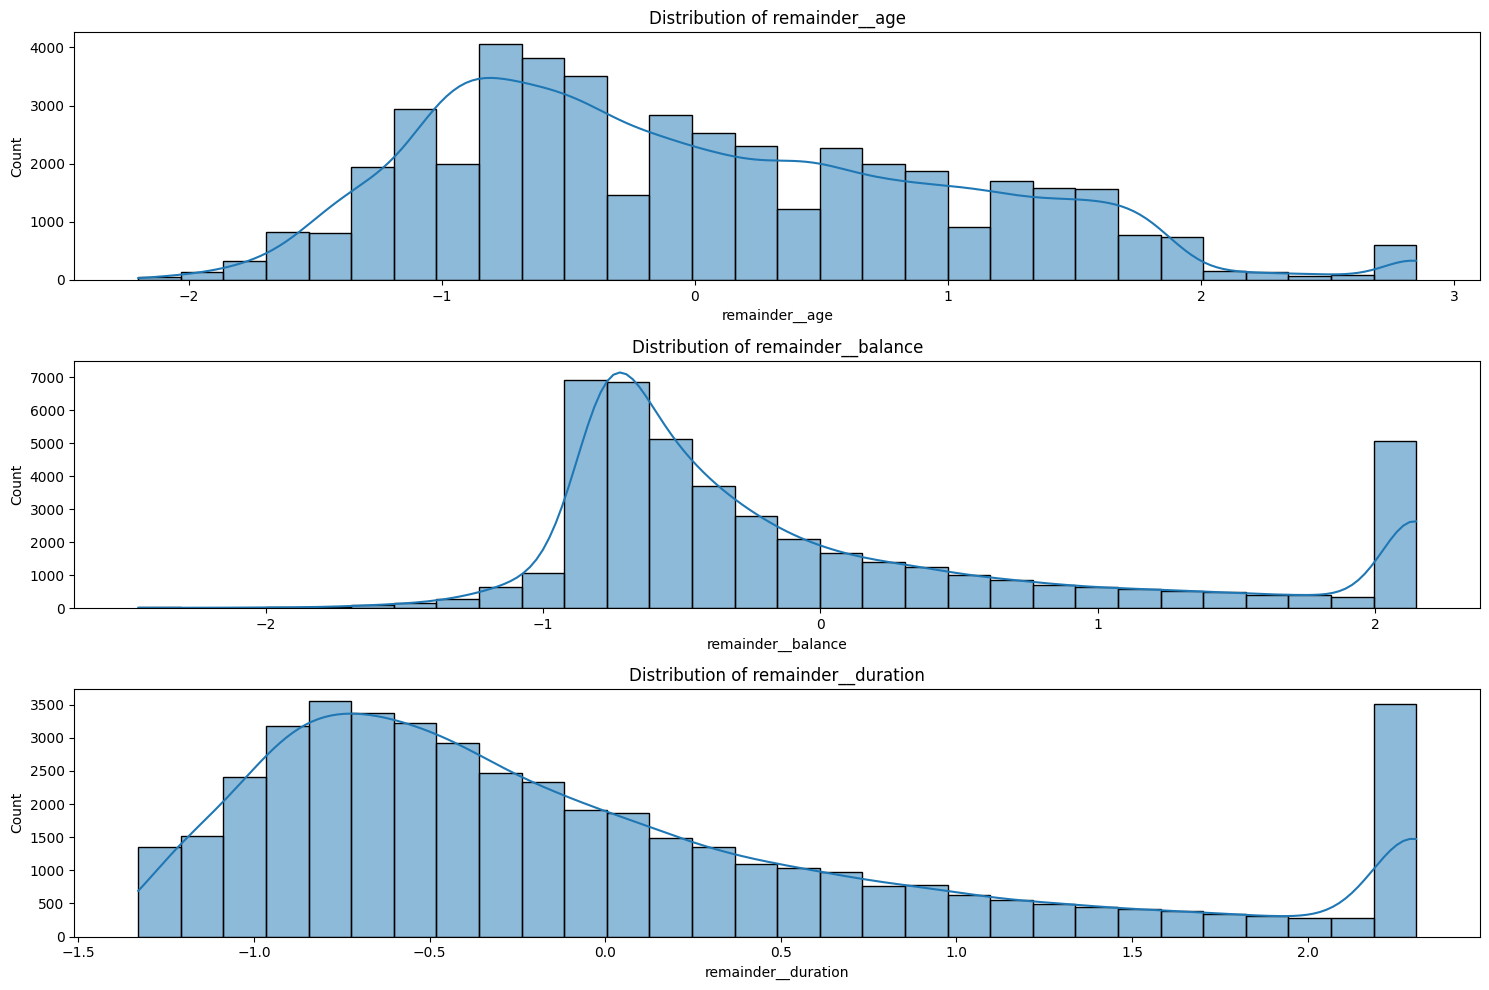

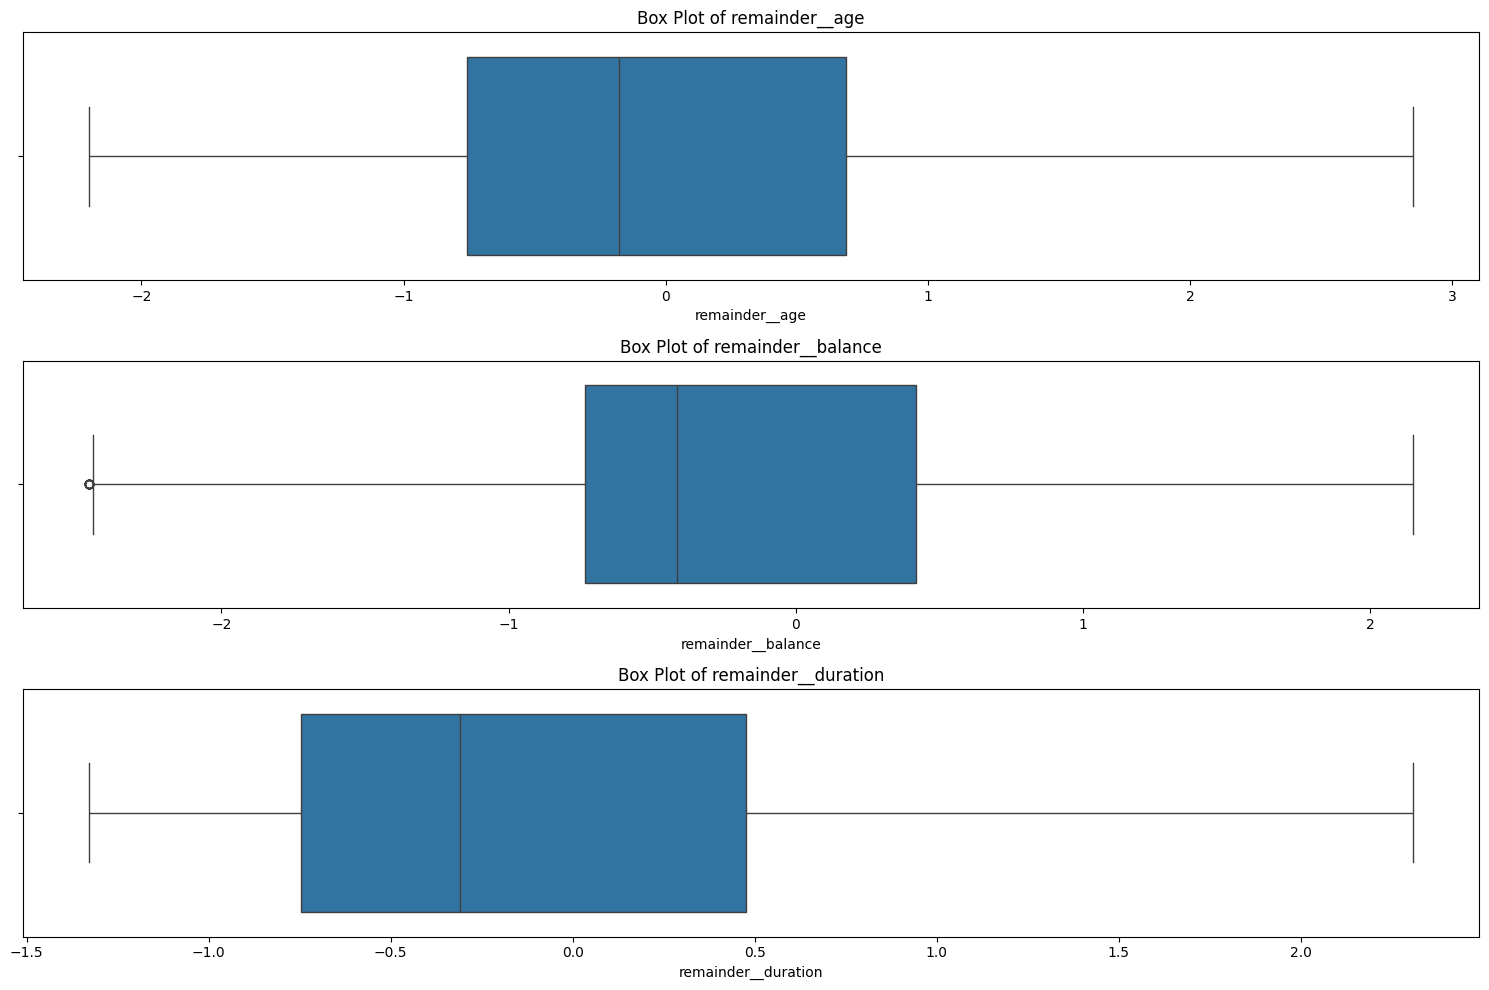


--- Correlation Analysis ---


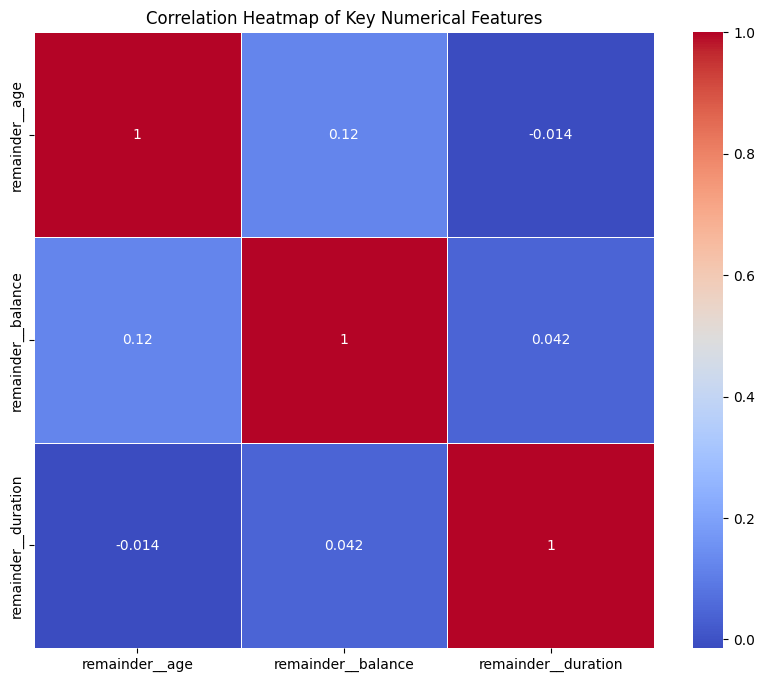

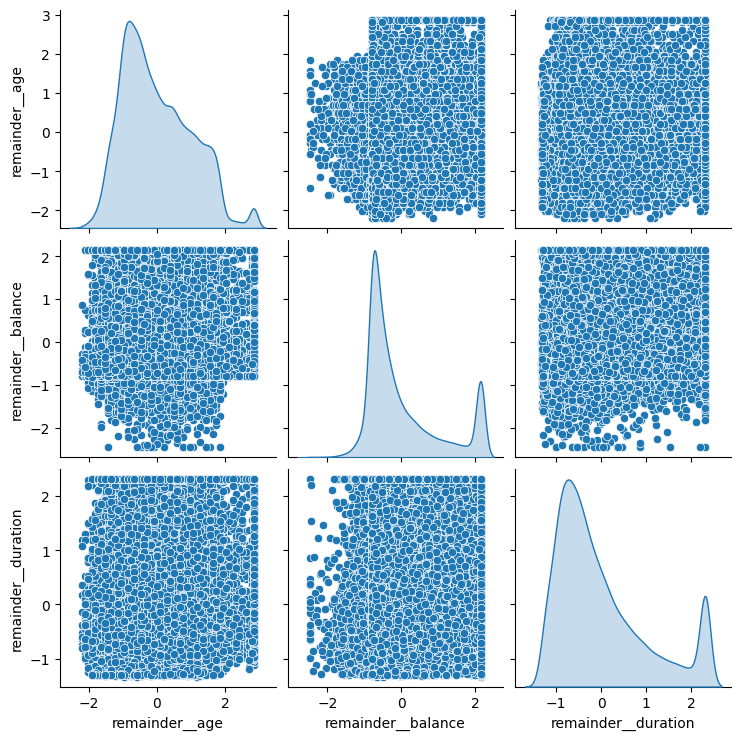


--- Segmentation Hypotheses ---


In [16]:
# Step 1: Distribution Analysis
# -----------------------------

print("\n--- Distribution Analysis ---")

# Select the key numerical features for distribution analysis
# In this case, let's pick features like age, balance, duration
numerical_columns = ['remainder__age', 'remainder__balance', 'remainder__duration']

# Plot histograms to understand the distribution of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 1, i + 1)
    sns.histplot(encoded_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots to analyze potential outliers and the spread of values
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(x=encoded_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Step 2: Correlation Analysis
# ----------------------------

print("\n--- Correlation Analysis ---")

# Compute correlation matrix for numerical columns
correlation_matrix = encoded_df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

# Pair Plot to observe pairwise relationships between selected numerical features
sns.pairplot(encoded_df, vars=numerical_columns, diag_kind='kde')
plt.show()

# Step 3: Segmentation Hypotheses
# -------------------------------

print("\n--- Segmentation Hypotheses ---")

# Based on the visualizations, you can identify potential clusters.
# Here are some potential customer segments that might be worth considering:

# Hypothesis 1: Age-based Segments
# - Customers aged below 30: Possibly young and tech-savvy.
# - Customers aged 30-50: Middle-aged customers, likely working professionals.
# - Customers above 50: Senior customers, might need more personalized services.

# Hypothesis 2: Balance-based Segments
# - Low Balance: Customers with average balance below 1000.
# - Medium Balance: Balance between 1000 and 5000.
# - High Balance: Balance above 5000, likely to need different types of services.

# Hypothesis 3: Engagement-based Segments
# - Low Duration Engagement: Customers whose average contact duration is below 100 seconds.
# - Medium Duration Engagement: Customers with average duration between 100 and 300 seconds.
# - High Duration Engagement: Customers who typically have long conversations, above 300 seconds.

# You could also look into more complex segments based on combining these features.


In [ ]:
# Feature Selection


--- Feature Selection ---

Features selected for clustering:
Index(['cat__job_blue-collar', 'cat__job_entrepreneur', 'cat__job_housemaid',
       'cat__job_management', 'cat__job_retired', 'cat__job_self-employed',
       'cat__job_services', 'cat__job_student', 'cat__job_technician',
       'cat__job_unemployed', 'cat__job_unknown', 'cat__marital_married',
       'cat__marital_single', 'cat__education_secondary',
       'cat__education_tertiary', 'cat__education_unknown', 'cat__default_yes',
       'cat__housing_yes', 'cat__loan_yes', 'cat__contact_telephone',
       'cat__contact_unknown', 'cat__month_aug', 'cat__month_dec',
       'cat__month_feb', 'cat__month_jan', 'cat__month_jul', 'cat__month_jun',
       'cat__month_mar', 'cat__month_may', 'cat__month_nov', 'cat__month_oct',
       'cat__month_sep', 'cat__poutcome_other', 'cat__poutcome_success',
       'cat__poutcome_unknown', 'cat__y_yes', 'remainder__age',
       'remainder__balance', 'remainder__duration', 'remainder__campa

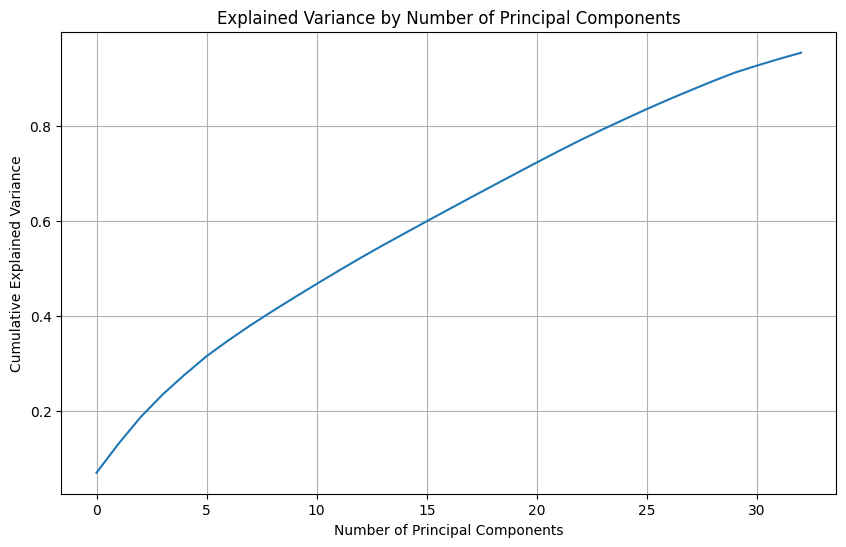


First 5 Rows after PCA Transformation:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.281574 -0.388489  0.148984  3.692290 -0.948488  0.183644  0.570846   
1 -2.068575  1.700493  1.146432 -0.291786  0.567163 -0.688872  1.397617   
2 -2.741622 -0.137816  0.104610  0.797288 -0.877535  1.020693 -0.468246   
3 -2.167555 -0.478591 -0.652545  2.120831 -0.844878 -1.821511 -1.608074   
4 -0.587105  0.858866  0.832463  1.241046  2.392882 -3.874725 -3.638492   

        PC8       PC9      PC10  ...      PC24      PC25      PC26      PC27  \
0 -0.009972 -0.064423  1.313015  ...  0.425401 -0.220583 -0.226177  0.131616   
1  0.125646  0.080519  1.364778  ... -0.210938 -0.092480 -0.166476 -0.311069   
2  1.109832 -1.041074 -0.176728  ... -0.749970  1.452350 -0.698268  1.003389   
3 -1.706679  2.365132 -0.175972  ...  0.286147 -0.749819  2.036781 -1.152685   
4 -2.092266  4.685387 -1.154139  ... -2.530850  4.520085 -3.071679  1.309914   

       PC28      PC29      P

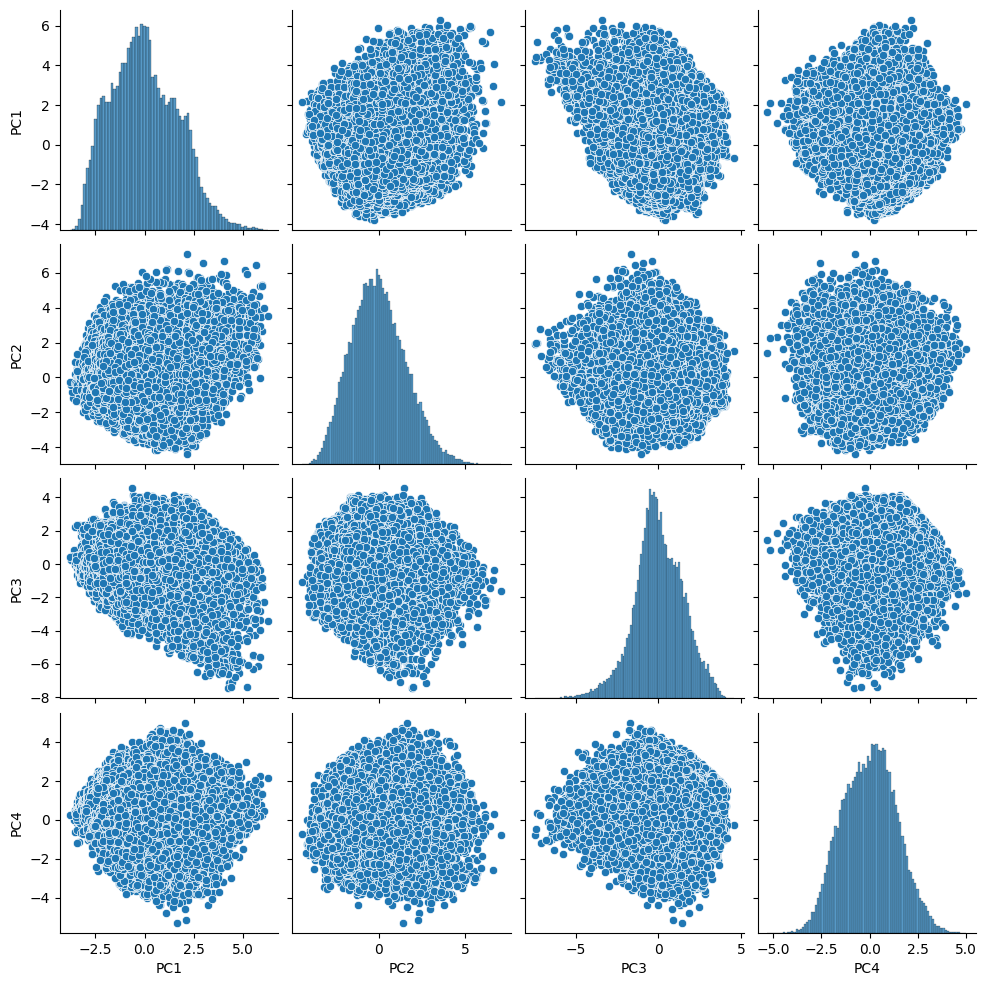

In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature Selection
# --------------------------

print("\n--- Feature Selection ---")

# Drop unnecessary features that may not provide value for clustering
# For this specific dataset, we can drop features such as:
# - 'day' (day of the month), as it might not be significant for clustering
# - Any identifier columns (like 'Campaign_ID', which we do not have here)
# - We also ensure we only use numerical features for PCA and clustering

features_to_drop = ['remainder__day']  # Example of features that may not add value
if set(features_to_drop).issubset(encoded_df.columns):
    encoded_df = encoded_df.drop(columns=features_to_drop)

# Keep only numerical features for clustering
numerical_features = encoded_df.select_dtypes(include=['float64', 'int64']).columns
df_selected = encoded_df[numerical_features]

print("\nFeatures selected for clustering:")
print(df_selected.columns)

# Step 2: Dimensionality Reduction with PCA
# -----------------------------------------

print("\n--- Dimensionality Reduction with PCA ---")

# Standardize data before PCA
# Note: The data is already standardized in the previous steps, so we can proceed directly to PCA

# Initialize PCA
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
pca_transformed = pca.fit_transform(df_selected)

# Checking how much variance each principal component explains
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio by Each Principal Component:")
print(explained_variance_ratio)

# Plot cumulative explained variance to determine the number of components needed
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# Create a new DataFrame from PCA-transformed data
pca_columns = [f'PC{i+1}' for i in range(pca_transformed.shape[1])]
df_pca = pd.DataFrame(data=pca_transformed, columns=pca_columns)

print("\nFirst 5 Rows after PCA Transformation:")
print(df_pca.head())

# Step 3: Summary of Findings
# ---------------------------
print("\n--- Summary of Feature Selection and PCA ---")
print(f"Original number of features: {encoded_df.shape[1]}")
print(f"Number of features after PCA: {df_pca.shape[1]}")
print("The PCA-transformed data will now be used for clustering.")

# Note: You can visualize how the data looks after PCA transformation
sns.pairplot(df_pca.iloc[:, :4])  # Visualizing the first few principal components
plt.show()


In [ ]:
# Clustering Model Selection


--- Finding Optimal Number of Clusters ---


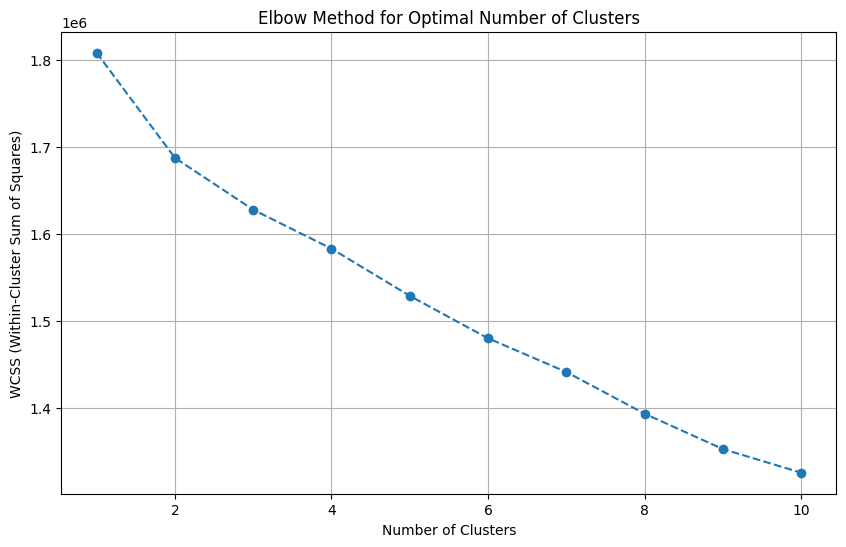


--- Silhouette Analysis ---
For n_clusters = 2, the average silhouette_score is 0.0904
For n_clusters = 3, the average silhouette_score is 0.0619
For n_clusters = 4, the average silhouette_score is 0.0691
For n_clusters = 5, the average silhouette_score is 0.0600
For n_clusters = 6, the average silhouette_score is 0.0666
For n_clusters = 7, the average silhouette_score is 0.0770
For n_clusters = 8, the average silhouette_score is 0.0839
For n_clusters = 9, the average silhouette_score is 0.0792
For n_clusters = 10, the average silhouette_score is 0.0802


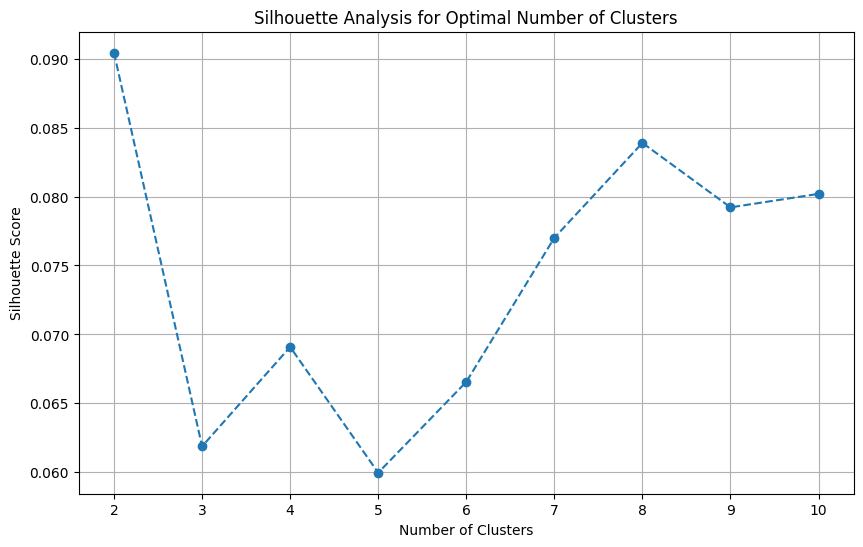


--- Training K-Means Model ---

Clusters assigned to the dataset:
Cluster
1    15733
2    15462
0    12713
3     1303
Name: count, dtype: int64


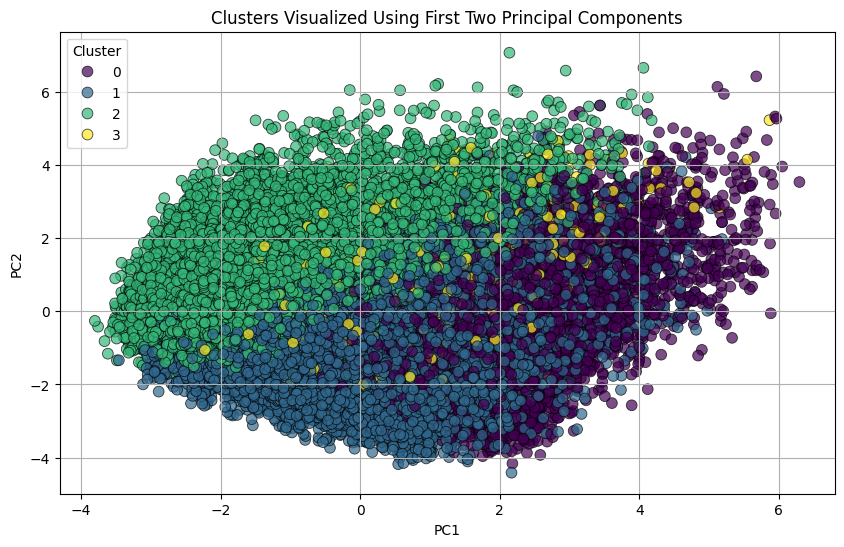

In [21]:
# Train the Clustering Model

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset after PCA transformation is named `df_pca`
# df_pca is expected to be a pandas DataFrame with columns ['PC1', 'PC2', ..., 'PC33']

# Step 1: Choose Clustering Algorithm
# Start with K-Means Clustering for a baseline

# Step 2: Determine Optimal Number of Clusters
print("\n--- Finding Optimal Number of Clusters ---")

# Elbow Method to find the optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares
max_clusters = 10  # Set a reasonable maximum for clusters

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Silhouette Analysis to determine the optimal number of clusters
print("\n--- Silhouette Analysis ---")

silhouette_scores = []
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the average silhouette_score is {silhouette_avg:.4f}")

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Step 3: Train the Clustering Model
# Based on the Elbow and Silhouette Analysis, let's pick an appropriate number of clusters
# For demonstration, let's assume we choose 4 clusters
optimal_clusters = 4

# Train the K-Means model with the optimal number of clusters
print("\n--- Training K-Means Model ---")
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df_pca['Cluster'] = kmeans_final.fit_predict(df_pca)

# Display the number of data points in each cluster
print("\nClusters assigned to the dataset:")
print(df_pca['Cluster'].value_counts())

# Visualizing Clusters using the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=60, alpha=0.7, edgecolor='k'
)
plt.title('Clusters Visualized Using First Two Principal Components')
plt.grid(True)
plt.show()


In [ ]:
# Evaluate and Interpret Clusters


--- Cluster Profiling ---
         cat__job_blue-collar  cat__job_entrepreneur  cat__job_housemaid  \
Cluster                                                                    
0                   -0.507286               0.062745           -0.106078   
1                    0.444935              -0.029291           -0.101811   
2                    0.094932               0.054133            0.163164   
3                    0.036079              -0.040925            0.093581   

         cat__job_management  cat__job_retired  cat__job_self-employed  \
Cluster                                                                  
0                   1.053853         -0.122420                0.146731   
1                  -0.427661         -0.124028               -0.084261   
2                  -0.168759          0.040213                0.016597   
3                  -0.410769          0.156125               -0.052764   

         cat__job_services  cat__job_student  cat__job_technician  \
Cl

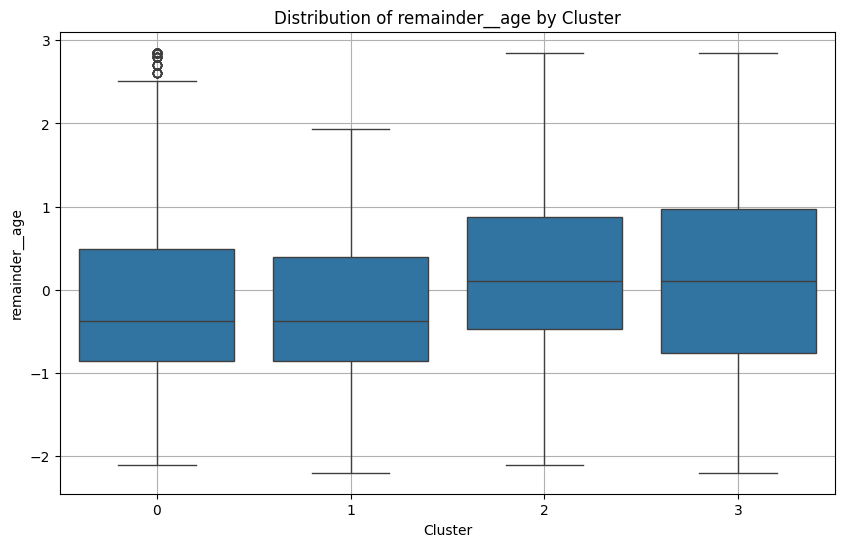

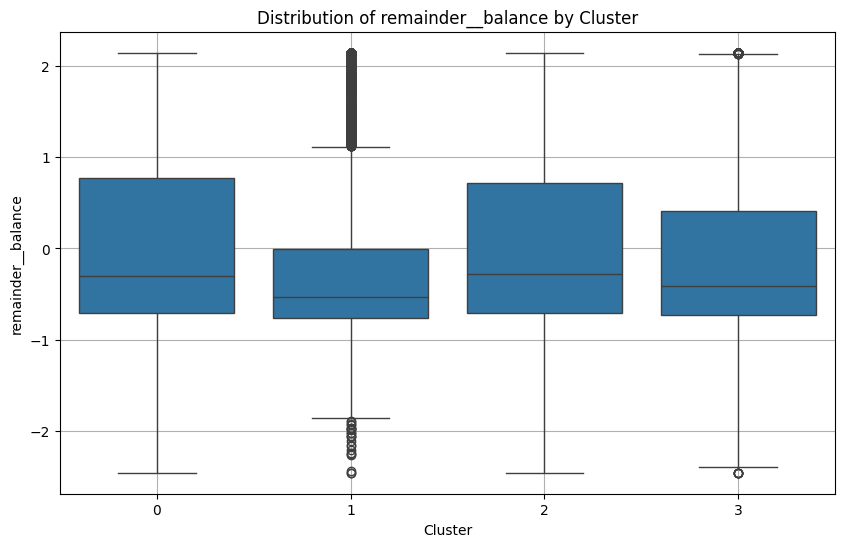

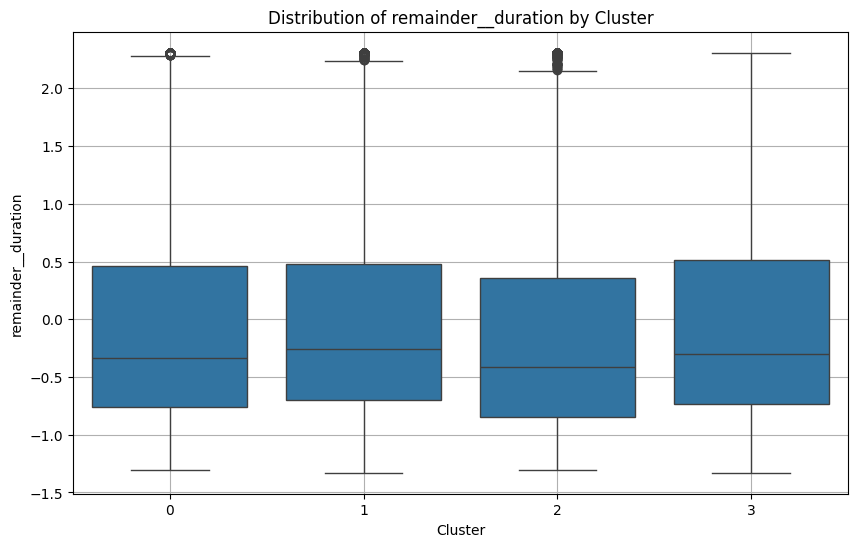

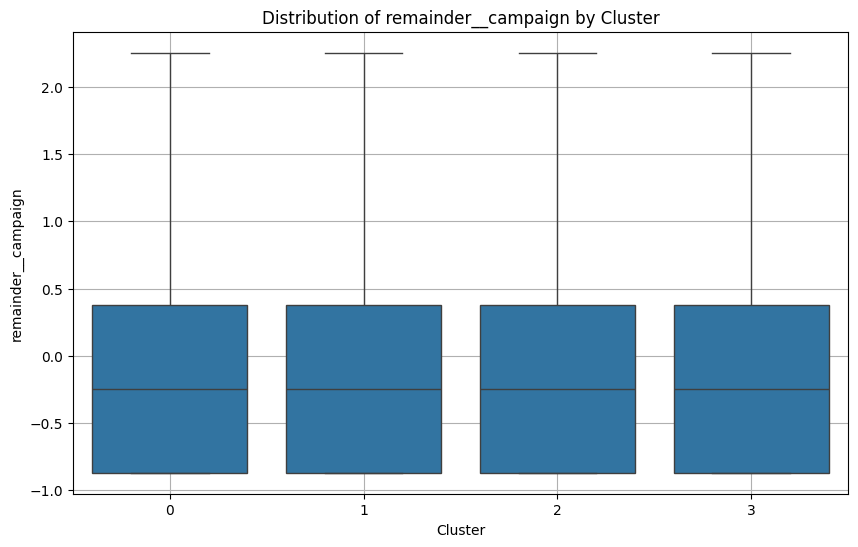

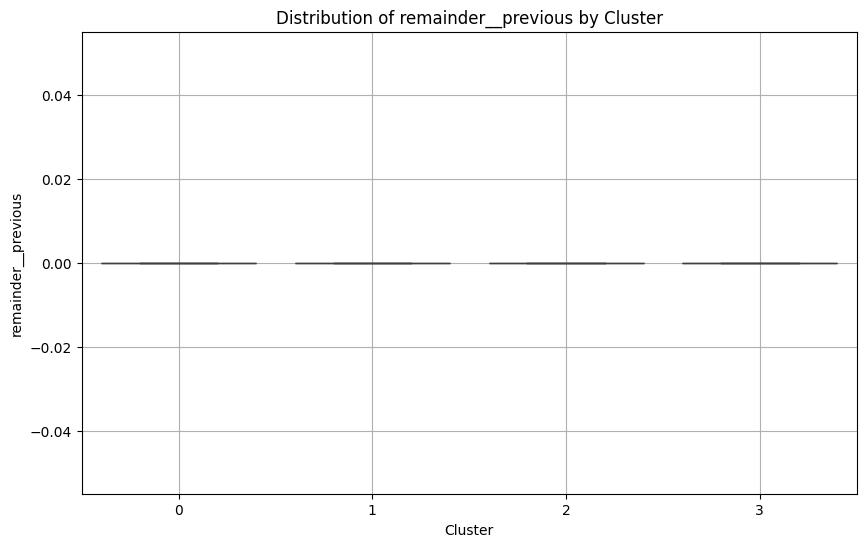

C:\Users\milto\AppData\Local\Temp\ipykernel_2208\589124798.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=encoded_df, palette='viridis')


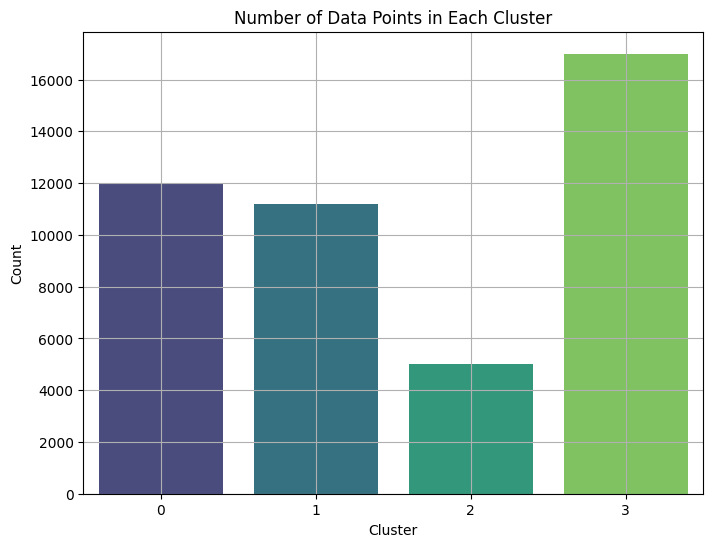


--- Cluster Insights ---

--- Insights for Cluster 0 ---
Average Age: -0.13
Median Balance: -0.30
Average Duration of Last Contact: -0.01
Percentage with Loan: -7.86%

--- Insights for Cluster 1 ---
Average Age: -0.21
Median Balance: -0.54
Average Duration of Last Contact: 0.02
Percentage with Loan: -2.22%

--- Insights for Cluster 2 ---
Average Age: 0.17
Median Balance: -0.28
Average Duration of Last Contact: -0.10
Percentage with Loan: -5.20%

--- Insights for Cluster 3 ---
Average Age: 0.18
Median Balance: -0.41
Average Duration of Last Contact: 0.02
Percentage with Loan: 8.54%


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming:
# - `encoded_df` is the DataFrame after encoding and scaling (original feature DataFrame)
# - `kmeans` is the trained K-Means model

# Adding cluster labels to the original encoded DataFrame for evaluation
encoded_df['Cluster'] = kmeans.labels_

# Identify the numerical features to inverse transform
numerical_features = ['remainder__age', 'remainder__balance', 'remainder__duration', 
                      'remainder__campaign', 'remainder__previous']

# Create a new StandardScaler instance specifically for the selected numerical features
scaler_subset = StandardScaler()

# Fit the scaler on the selected numerical columns (using the original unscaled DataFrame)
scaler_subset.fit(encoded_df[numerical_features])

# Perform the inverse transformation for these specific columns only
numerical_df = encoded_df[numerical_features]
numerical_df_original = pd.DataFrame(scaler_subset.inverse_transform(numerical_df), columns=numerical_features)

# Replace the scaled numerical features in the DataFrame with their original values
encoded_df[numerical_features] = numerical_df_original

# Cluster Profiling
print("\n--- Cluster Profiling ---")
cluster_profile = encoded_df.groupby('Cluster').mean()
print(cluster_profile)

# Visualize Characteristics of Each Cluster
features_to_plot = numerical_features
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=encoded_df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.grid(True)
    plt.show()

# Visualize the Size of Each Cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=encoded_df, palette='viridis')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Extract Insights for Each Cluster in Business Terms
print("\n--- Cluster Insights ---")

for cluster_label in encoded_df['Cluster'].unique():
    cluster_data = encoded_df[encoded_df['Cluster'] == cluster_label]
    print(f"\n--- Insights for Cluster {cluster_label} ---")
    
    # Average Age
    avg_age = cluster_data['remainder__age'].mean()
    print(f"Average Age: {avg_age:.2f}")

    # Median Balance
    median_balance = cluster_data['remainder__balance'].median()
    print(f"Median Balance: {median_balance:.2f}")

    # Average Duration of Last Contact
    avg_duration = cluster_data['remainder__duration'].mean()
    print(f"Average Duration of Last Contact: {avg_duration:.2f}")

    # Percentage of People with Loans
    if 'cat__loan_yes' in cluster_data.columns:
        pct_loan = cluster_data['cat__loan_yes'].mean() * 100
        print(f"Percentage with Loan: {pct_loan:.2f}%")

    # Most Common Contact Method
    if 'cat__contact_cellular' in cluster_data.columns:
        contact_columns = [col for col in cluster_data.columns if col.startswith('cat__contact_')]
        contact_means = cluster_data[contact_columns].mean()
        most_common_contact = contact_means.idxmax().replace('cat__contact_', '')
        print(f"Most Common Contact Method: {most_common_contact}")


In [ ]:
Step 8: Business Recommendations

    Tailored Services:
        Recommend targeted services for each cluster. For example, offer premium financial advice to high-value customers or personalized loan offers to young professionals.

    Marketing Campaign Strategy:
        Design campaigns tailored to the needs of each cluster, ensuring better customer engagement and satisfaction.

Step 9: Deploying the Solution

    Dashboard:
        Consider building a dashboard for visualizing and exploring clusters, using tools like Tableau, Power BI, or a Python-based web app (e.g., using Streamlit).

    Operationalization:
        If the segmentation needs to be updated periodically, deploy a pipeline that automatically performs segmentation when new data is added.